In [1]:
@network_operation(dt=stimulus_update_interval)
def update_poisson_stimulus(t):
    if t >= t_stimulus_start and t < t_stimulus_end:
        offset_A = mu0_mean_stimulus_Hz * (0.5 + 0.5 * coherence_level)
        offset_B = mu0_mean_stimulus_Hz * (0.5 - 0.5 * coherence_level)

        rate_A = numpy.random.normal(offset_A, stimulus_std_Hz)
        rate_A = (max(0, rate_A)) * b2.Hz  # avoid negative rate
        rate_B = numpy.random.normal(offset_B, stimulus_std_Hz)
        rate_B = (max(0, rate_B)) * b2.Hz

        poissonStimulus2A.rates = rate_A
        poissonStimulus2B.rates = rate_B

        stim_info.append(rate_A)
        # print("stim on. rate_A= {}, rate_B = {}".format(rate_A, rate_B))
    else:
        # print("stim off")
        poissonStimulus2A.rates = 0.
        poissonStimulus2B.rates = 0.

        stim_info.append(0)
        #print('0')
    return stim_info

NameError: name 'network_operation' is not defined

In [2]:
import wang

stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Sat Jun  4 18:57:05 2022


xcode-select: note: no developer tools were found at '/Applications/Xcode.app', requesting install. Choose an option in the dialog to download the command line developer tools.
WARNING    Cannot use Cython, a test compilation failed: command '/usr/bin/clang' failed with exit code 1 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Sat Jun  4 18:58:07 2022


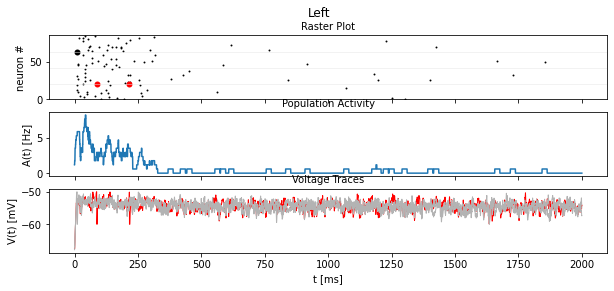

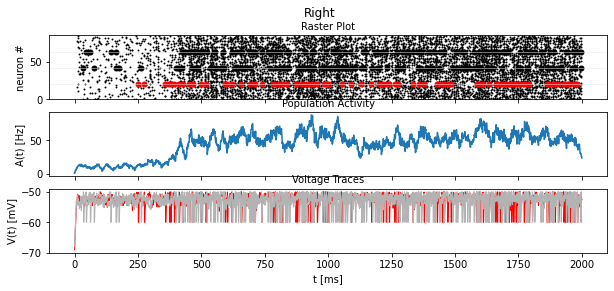

In [3]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [9]:
rates = results['stim_info']




In [12]:
numpy.asarray(rates)

array([125.89587824, 106.85820963, 111.05623062, 111.69583403,
        89.28442824, 144.55896066, 122.71234226, 116.08751813,
       136.45555162, 105.96302398, 134.74829377, 143.16503202,
       167.14735763, 130.41517597, 147.55937461, 138.17229759,
        86.64291365,  92.88537333, 123.00653158, 140.46449988,
       156.42741826, 126.10113342, 144.84702222, 114.27499884,
       121.7388724 , 116.9057182 , 116.41140699, 103.94852029,
       140.18470369,  95.16199092, 125.6567792 , 132.00769411,
       147.41402773, 140.19494177,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [11]:
b2.asarray(rates)

array([125.89587824, 106.85820963, 111.05623062, 111.69583403,
        89.28442824, 144.55896066, 122.71234226, 116.08751813,
       136.45555162, 105.96302398, 134.74829377, 143.16503202,
       167.14735763, 130.41517597, 147.55937461, 138.17229759,
        86.64291365,  92.88537333, 123.00653158, 140.46449988,
       156.42741826, 126.10113342, 144.84702222, 114.27499884,
       121.7388724 , 116.9057182 , 116.41140699, 103.94852029,
       140.18470369,  95.16199092, 125.6567792 , 132.00769411,
       147.41402773, 140.19494177,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  